1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigendecomposition Eigenvalues: [ 2.77549429e+01 -6.83387563e-16  2.08278567e+00] 
 Eigendecomposition Eigenvectors:
 [[-0.11441522 -0.81649658  0.56589972]
 [-0.57866755 -0.40824829 -0.70602918]
 [-0.807498    0.40824829  0.42577026]]
 SVD Eigenvalues: [2.77549429e+01 2.08278567e+00 9.66855924e-16]
 SVD Eigenvectors:
 [[-0.11441522  0.56589972 -0.81649658]
 [-0.57866755 -0.70602918 -0.40824829]
 [-0.807498    0.42577026  0.40824829]]
Eigenvalues Comparison: [ True  True  True]
The first principal component explains 93.01962391009289% of the total variability,
the second principal explains 6.98037608990712%, and the third principal component explains -2.2903471433960103e-15%
Reduce dim retaining at least 99% of total variability: 2
A reduction to only the first two components make sense as the third component is a linear combination og the first two.


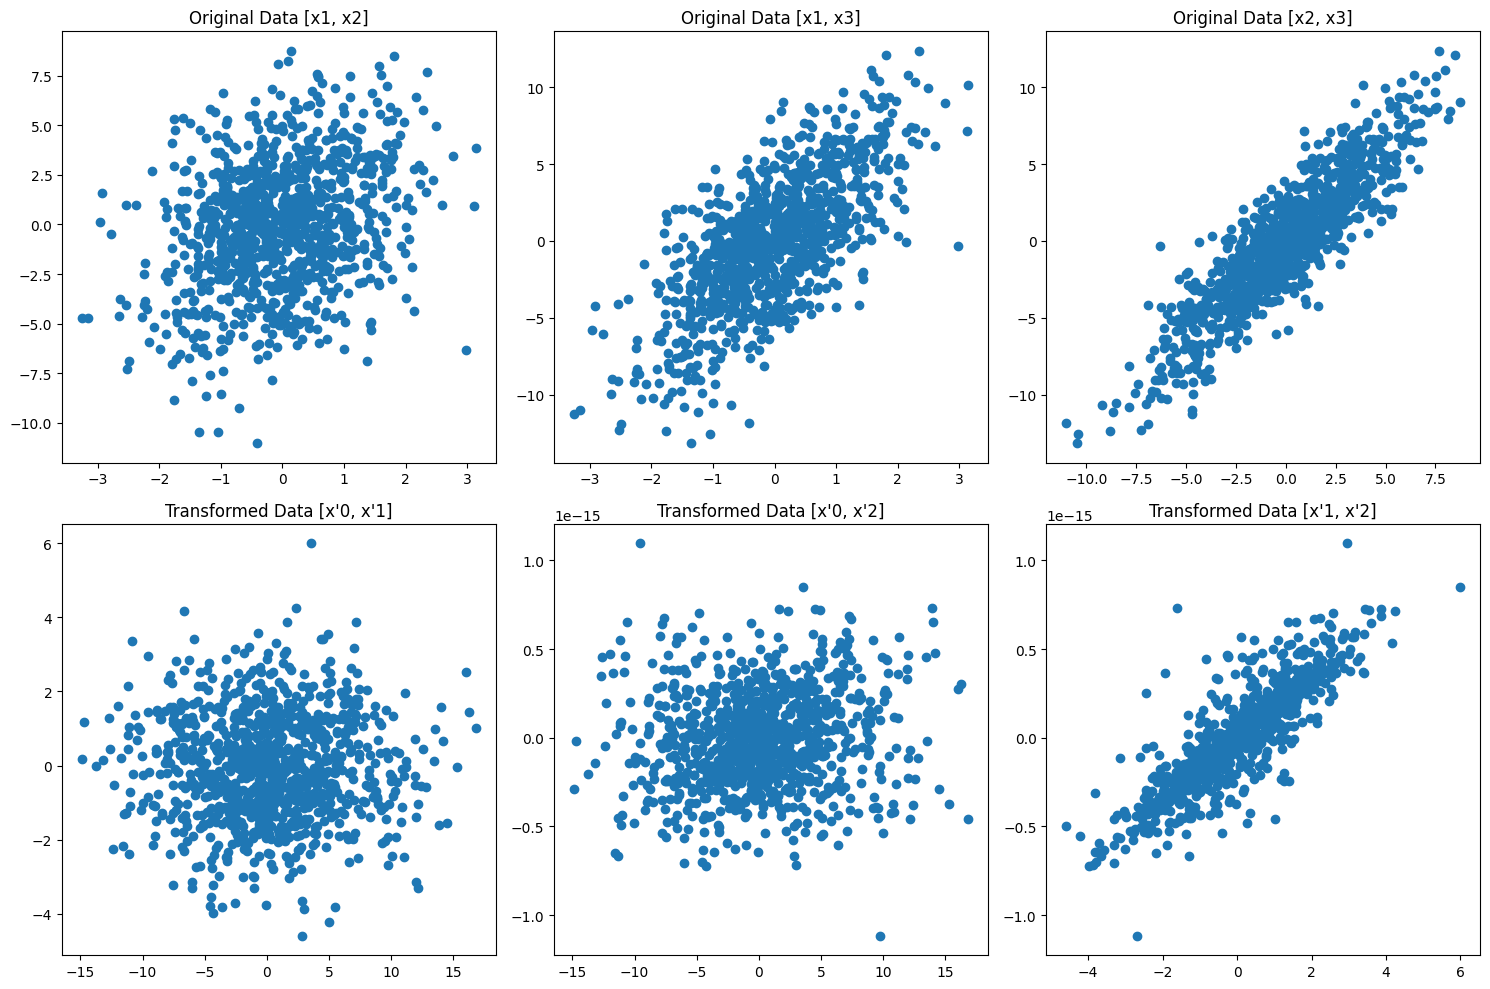

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N = 1000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2

dataset = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3
})

cov_matrix = dataset.cov()
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

U, S, V = np.linalg.svd(cov_matrix)
svd_eigenvalues = S
svd_eigenvectors = U

eigenvalues_comparison = np.isclose(sorted(eigenvalues), sorted(svd_eigenvalues))


print(f"Eigendecomposition Eigenvalues: {eigenvalues} \n Eigendecomposition Eigenvectors:\n {eigenvectors}\n SVD Eigenvalues: {svd_eigenvalues}\n SVD Eigenvectors:\n {svd_eigenvectors}\nEigenvalues Comparison: {eigenvalues_comparison}")


sorted_eigenvalues = np.sort(eigenvalues)[::-1]
variance_explained = sorted_eigenvalues / sorted_eigenvalues.sum()
cumulative_variance_explained = np.cumsum(variance_explained)
num_components_99_variance = np.argmax(cumulative_variance_explained >= 0.99) + 1


print(f"The first principal component explains {variance_explained[0]*100}% of the total variability,\nthe second principal explains {variance_explained[1]*100}%, and the third principal component explains {variance_explained[2]*100}%")

num_components_99_variance = np.argmax(cumulative_variance_explained >= 0.99) + 1

print(f"Reduce dim retaining at least 99% of total variability: {num_components_99_variance}\nA reduction to only the first two components make sense as the third component is a linear combination og the first two.")


sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
transformed_data = dataset.dot(sorted_eigenvectors)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))


axs[0, 0].scatter(dataset['x1'], dataset['x2'])
axs[0, 0].set_title('Original Data [x1, x2]')
axs[0, 1].scatter(dataset['x1'], dataset['x3'])
axs[0, 1].set_title('Original Data [x1, x3]')
axs[0, 2].scatter(dataset['x2'], dataset['x3'])
axs[0, 2].set_title('Original Data [x2, x3]')


axs[1, 0].scatter(transformed_data[0], transformed_data[1])
axs[1, 0].set_title("Transformed Data [x'0, x'1]")
axs[1, 1].scatter(transformed_data[0], transformed_data[2])
axs[1, 1].set_title("Transformed Data [x'0, x'2]")
axs[1, 2].scatter(transformed_data[1], transformed_data[2])
axs[1, 2].set_title("Transformed Data [x'1, x'2]")


plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [72]:
for i in range(10):
    dataset[f'noise_{i+1}'] = np.random.normal(0, 1/20, N)

new_cov_matrix = dataset.cov()
new_eigenvalues, new_eigenvectors = np.linalg.eig(new_cov_matrix)
new_sorted_indices = np.argsort(new_eigenvalues)[::-1]
new_sorted_eigenvectors = new_eigenvectors[:, new_sorted_indices]

new_transformed_data = dataset.dot(new_sorted_eigenvectors)

new_variance_explained = new_eigenvalues[new_sorted_indices] / new_eigenvalues[new_sorted_indices].sum()
new_cumulative_variance_explained = np.cumsum(new_variance_explained)

print(f"New eigenvalues: {new_eigenvalues}\nNew Variance Explained {new_variance_explained}\nNew Cumulative Variance Explained {new_cumulative_variance_explained} ")

print(f"Looking at the new cumulative variance, one can once again reduce the dimension to two and still retain 99% of the total variability.")

New eigenvalues: [ 2.77549540e+01  2.08281787e+00 -1.30014686e-16  1.96774585e-03
  2.07618062e-03  2.19944325e-03  2.99678716e-03  2.39064698e-03
  2.54374202e-03  2.56321738e-03  2.78397415e-03  2.69496025e-03
  2.71929279e-03]
New Variance Explained [ 9.29418529e-01  6.97464503e-02  1.00352157e-04  9.32257770e-05
  9.10598196e-05  9.02450058e-05  8.58333876e-05  8.51812242e-05
  8.00545950e-05  7.36518357e-05  6.95241915e-05  6.58930818e-05
 -4.35374739e-18]
New Cumulative Variance Explained [0.92941853 0.99916498 0.99926533 0.99935856 0.99944962 0.99953986
 0.9996257  0.99971088 0.99979093 0.99986458 0.99993411 1.
 1.        ] 
Looking at the new cumulative variance, one can once again reduce the dimension to two and still retain 99% of the total variability.


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [73]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 